In [1]:
# !pip install selenium
# !pip install requests
# !pip install BeautifulSoup4
# !pip install pandas
# !pip install numpy
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from selenium import webdriver
from requests import get
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
from time import sleep
from random import randint
from time import time
from warnings import warn
from datetime import datetime
from datetime import timedelta
from pytz import timezone
from IPython.display import clear_output
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import re
import os
import sys
import glob
import shutil
from pathlib import Path
import plotly.express as px

In [3]:
data=pd.read_excel('DataClean.xlsx')
data

Điểm đánh giá   Quốc gia    Kiểu khách hàng   
0               8.4   Việt Nam               Nhóm  \
1               8.3   Việt Nam  Gia đình có em bé   
2               9.7   Việt Nam  Gia đình có em bé   
3               8.0   Việt Nam            Cặp đôi   
4               8.8   Việt Nam        Đi công tác   
...             ...        ...                ...   
1095            6.0  Hồng Kông   Du lịch một mình   
1096           10.0   Việt Nam        Đi công tác   
1097           10.0   Việt Nam  Gia đình có em bé   
1098           10.0   Việt Nam  Gia đình có em bé   
1099            8.0   Việt Nam            Cặp đôi   

                                   Kiểu phòng Thời gian   
0                  Phòng Deluxe 2 Giường đơn     1 đêm  \
1                             Executive Suite     4 đêm   
2                    Deluxe gia đình 3 giường     2 đêm   
3                          Deluxe giường King     1 đêm   
4                           Superior 2 giường     1 đêm   
...                                       ...       ...   
1095                       Deluxe giường King     4 đêm   
1096  Phòng Superior 2 giường không có cửa sổ     1 đêm   
1097                          Deluxe 2 giường     2 đêm   
1098  Phòng Superior 2 giường không có cửa sổ     1 đêm   
1099                       Deluxe giường King     1 đêm   

                                         Title   
0     Vị trí tốt, phù hợp công tác hay du lịch  \
1                               Khách sạn tốt!   
2                         Phòng tốt và sạch sẽ   
3                     VỀ KHÁCH SẠN MƯỜNG THANH   
4                                    Tuyệt vời   
...                                        ...   
1095                           Trên Trung Bình   
1096                                        Hi   
1097                         Trên cả tuyệt vời   
1098                                       tot   
1099                                       Tot   

                                               Nhận xét   
0     Khách sạn nằm vị trí gần cầu Rồng, giá cả tốt....  \
1     1) Phòng nghỉ tốt. 2) Giá hợp lý. 3) Phục vụ t...   
2     Phòng sạch sẽ, giường ngủ rộng, Phòng sạch sẽ,...   
3     Khách sạn phục vụ tốt. Tuy nhiên, tôi book phò...   
4     Khách sạn nên chú ý về phần ăn cho khách mang ...   
...                                                 ...   
1095  Kramers zijn niet goed geisoleerd, je hoort al...   
1096                                                 Ok   
1097                      Vị trí đẹp. Buffet hơi ít món   
1098                                                tot   
1099                                                Tot   

                                          Tên khách sạn   
0     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...  \
1     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
2     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
3     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
4     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
...                                                 ...   
1095  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1096  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1097  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1098  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1099  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   

                                                Địa chỉ  
0     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  
1     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  
2     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  
3     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  
4     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  
...                                                 ...  
1095  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...  
1096  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...  
1097  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...  
1098  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...  
109

In [4]:
# !pip install underthesea
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Phân tích từ khóa

In [5]:
import underthesea
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
def Text_Preprocessing(doc):
    text_pre = doc.lower()
    
    text_pre = underthesea.word_tokenize(text_pre, format="text")
    text_pre = underthesea.text_normalize(text_pre)
    
    text_pre = text_pre.replace('XXXX', '')        
    text_pre = text_pre.replace(u'\ufffd', '')   # Replaces the ASCII symbol with ''
    text_pre = re.sub(r'[^\w\s]','',text_pre)
    text_pre = text_pre.rstrip('\n')              # Removes line breaks
    text_pre = text_pre.casefold()                # Makes all letters lowercase
    
    text_pre = re.sub('\W_',' ', text_pre)        # removes specials characters and leaves only words
    text_pre = re.sub("\S*\d\S*"," ", text_pre)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    text_pre = re.sub("\S*@\S*\s?"," ", text_pre) # removes emails and mentions (words with @)
    text_pre = re.sub(r'http\S+', '', text_pre)   # removes URLs with http
    text_pre = re.sub(r'www\S+', '', text_pre)    # removes URLs with www
    ##Remove stop words
    Path="D:/DAIHOC/KY6/QTCSDL"
    filename=os.path.join(Path, "vietnamese-stopwords.txt")
    f = open(filename, "r", encoding="utf-8")
    
    #Get Stop words Dictionaries
    List_StopWords=f.read().split("\n")
    text_pre=" ".join(text for text in text_pre.split() if text not in List_StopWords)
    stop = stopwords.words('english')   # Remove StopWords
    text_pre = " ".join(text_pre for text_pre in text_pre.split() if text_pre not in stop)
    return text_pre

In [6]:
def read_file(text):	   
    return text.encode('utf-8')
data['keyword']=None
for i in range(len(data['Nhận xét'])):
    data['keyword'][i]=Text_Preprocessing(read_file(data['Nhận xét'][i]))
data

C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1768720840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keyword'][i]=Text_Preprocessing(read_file(data['Nhận xét'][i]))
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1768720840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keyword'][i]=Text_Preprocessing(read_file(data['Nhận xét'][i]))
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1768720840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Điểm đánh giá   Quốc gia    Kiểu khách hàng   
0               8.4   Việt Nam               Nhóm  \
1               8.3   Việt Nam  Gia đình có em bé   
2               9.7   Việt Nam  Gia đình có em bé   
3               8.0   Việt Nam            Cặp đôi   
4               8.8   Việt Nam        Đi công tác   
...             ...        ...                ...   
1095            6.0  Hồng Kông   Du lịch một mình   
1096           10.0   Việt Nam        Đi công tác   
1097           10.0   Việt Nam  Gia đình có em bé   
1098           10.0   Việt Nam  Gia đình có em bé   
1099            8.0   Việt Nam            Cặp đôi   

                                   Kiểu phòng Thời gian   
0                  Phòng Deluxe 2 Giường đơn     1 đêm  \
1                             Executive Suite     4 đêm   
2                    Deluxe gia đình 3 giường     2 đêm   
3                          Deluxe giường King     1 đêm   
4                           Superior 2 giường     1 đêm   
...                                       ...       ...   
1095                       Deluxe giường King     4 đêm   
1096  Phòng Superior 2 giường không có cửa sổ     1 đêm   
1097                          Deluxe 2 giường     2 đêm   
1098  Phòng Superior 2 giường không có cửa sổ     1 đêm   
1099                       Deluxe giường King     1 đêm   

                                         Title   
0     Vị trí tốt, phù hợp công tác hay du lịch  \
1                               Khách sạn tốt!   
2                         Phòng tốt và sạch sẽ   
3                     VỀ KHÁCH SẠN MƯỜNG THANH   
4                                    Tuyệt vời   
...                                        ...   
1095                           Trên Trung Bình   
1096                                        Hi   
1097                         Trên cả tuyệt vời   
1098                                       tot   
1099                                       Tot   

                                               Nhận xét   
0     Khách sạn nằm vị trí gần cầu Rồng, giá cả tốt....  \
1     1) Phòng nghỉ tốt. 2) Giá hợp lý. 3) Phục vụ t...   
2     Phòng sạch sẽ, giường ngủ rộng, Phòng sạch sẽ,...   
3     Khách sạn phục vụ tốt. Tuy nhiên, tôi book phò...   
4     Khách sạn nên chú ý về phần ăn cho khách mang ...   
...                                                 ...   
1095  Kramers zijn niet goed geisoleerd, je hoort al...   
1096                                                 Ok   
1097                      Vị trí đẹp. Buffet hơi ít món   
1098                                                tot   
1099                                                Tot   

                                          Tên khách sạn   
0     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...  \
1     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
2     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
3     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
4     Khách sạn Mường Thanh Grand Đà Nẵng (Muong Tha...   
...                                                 ...   
1095  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1096  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1097  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1098  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   
1099  Khách sạn Mường Thanh Luxury Đà Nẵng (Muong Th...   

                                                Địa chỉ   
0     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...  \
1     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...   
2     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...   
3     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...   
4     962 Ngô Quyền, Quận Sơn Trà, Thành Phố Đà N...   
...                                                 ...   
1095  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...   
1096  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...   
1097  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hàn...   
1098  270 Võ Nguyên Giáp, Phường Mỹ An, Quận Ngũ Hà

In [7]:
Text_Preprocessing(read_file(data['Nhận xét'][0]))

'khách_sạn nằm vị_trí cầu rồng giá_cả khách_sạn đi phút trung_tâm cầu rồng khách_sạn hơi biển dịch_vụ tuy_nhiên thức_ăn bình_thường ngon lắm view khách_sạn đà_nẵng đẹp khách_sạn quán cafe tầng toàn_cảnh đi công_tác khách_sạn'

In [8]:
text=''
for i in data['keyword']:
    text=text+i+' '
text    

'khách_sạn nằm vị_trí cầu rồng giá_cả khách_sạn đi phút trung_tâm cầu rồng khách_sạn hơi biển dịch_vụ tuy_nhiên thức_ăn bình_thường ngon lắm view khách_sạn đà_nẵng đẹp khách_sạn quán cafe tầng toàn_cảnh đi công_tác khách_sạn phòng nghỉ giá hợp_lý phục_vụ khách_sạn kỳ nghỉ tuyệt_vời ks mường tuy_nhiên chủ khách_sạn xem_xét thay tất_cả hệ_thống thang_máy hệ_thống thang tệ chờ hiện_nay thang_máy có_thể giải_pháp thang thông_minh vấn_đề thang_máy phàn_nàn phòng sạch_sẽ giường ngủ rộng phòng sạch_sẽ giường ngủ rộng tối nhạc_sống piano sân_thượng có_thể cầu rồng phun lửa gia_đình hài_lòng khách_sạn đi đi taxi tầm km hơi bất_tiện đồ khách_sạn ngon khách_sạn phục_vụ tuy_nhiên book phòng deluxe double khách_sạn bố_trí phòng deluxe twin ghép giường hề báo check trao_đổi lễ_tân dduwwocj giải_thích thỏa_đáng yêu_cầu đổi phòng deluxe double ngoài_ra dịch_vụ khách_sạn chú_ý về_phần đi gọi cơm cá mặn ks chuẩn_bị cơm_chiên trứng báo hộp sữa_chua hỏng có_thể ngộ_độc khách_sạn sạch_sẽ phong_phú hợp khẩu

In [9]:
import nltk
# text_pre=re.sub(r'[^\w\s]','',text)
text_pre=nltk.word_tokenize(text) # Tokenizing
print("Number of words: ",len(text_pre))
print(text_pre)

Number of words:  11976
['khách_sạn', 'nằm', 'vị_trí', 'cầu', 'rồng', 'giá_cả', 'khách_sạn', 'đi', 'phút', 'trung_tâm', 'cầu', 'rồng', 'khách_sạn', 'hơi', 'biển', 'dịch_vụ', 'tuy_nhiên', 'thức_ăn', 'bình_thường', 'ngon', 'lắm', 'view', 'khách_sạn', 'đà_nẵng', 'đẹp', 'khách_sạn', 'quán', 'cafe', 'tầng', 'toàn_cảnh', 'đi', 'công_tác', 'khách_sạn', 'phòng', 'nghỉ', 'giá', 'hợp_lý', 'phục_vụ', 'khách_sạn', 'kỳ', 'nghỉ', 'tuyệt_vời', 'ks', 'mường', 'tuy_nhiên', 'chủ', 'khách_sạn', 'xem_xét', 'thay', 'tất_cả', 'hệ_thống', 'thang_máy', 'hệ_thống', 'thang', 'tệ', 'chờ', 'hiện_nay', 'thang_máy', 'có_thể', 'giải_pháp', 'thang', 'thông_minh', 'vấn_đề', 'thang_máy', 'phàn_nàn', 'phòng', 'sạch_sẽ', 'giường', 'ngủ', 'rộng', 'phòng', 'sạch_sẽ', 'giường', 'ngủ', 'rộng', 'tối', 'nhạc_sống', 'piano', 'sân_thượng', 'có_thể', 'cầu', 'rồng', 'phun', 'lửa', 'gia_đình', 'hài_lòng', 'khách_sạn', 'đi', 'đi', 'taxi', 'tầm', 'km', 'hơi', 'bất_tiện', 'đồ', 'khách_sạn', 'ngon', 'khách_sạn', 'phục_vụ', 'tuy_nhiên',

In [10]:
from nltk.probability import FreqDist
frequency_dist = FreqDist(word.lower() for word in text_pre)
print(frequency_dist.most_common(50))

[('hotel', 245), ('phòng', 233), ('good', 214), ('khách_sạn', 151), ('room', 144), ('nhân_viên', 136), ('staff', 124), ('location', 118), ('breakfast', 97), ('đẹp', 91), ('great', 86), ('view', 83), ('ok', 82), ('sạch_sẽ', 81), ('ks', 76), ('nice', 75), ('clean', 66), ('friendly', 59), ('nhiệt_tình', 58), ('service', 56), ('stay', 56), ('ko', 53), ('rooms', 52), ('đi', 50), ('beach', 50), ('vị_trí', 47), ('dịch_vụ', 44), ('thân_thiện', 44), ('giá', 42), ('đồ', 41), ('món', 41), ('biển', 40), ('helpful', 40), ('hài_lòng', 39), ('big', 39), ('trung_tâm', 37), ('ngon', 37), ('hơi', 36), ('rộng', 36), ('buffet', 35), ('phục_vụ', 32), ('mường', 32), ('phong', 32), ('san', 31), ('cũ', 30), ('pool', 30), ('price', 30), ('khach', 29), ('airport', 28), ('time', 27)]


In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


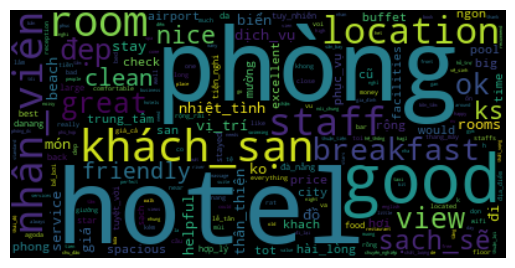

In [12]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Phân tích cảm xúc

In [13]:
def ngonngu(x):
    a=re.findall('[A-Za-z0-9\s,.?!()&_x000D_\/]',x)
    return a

In [14]:
# print(len('The hotel is extremely helpful and caring. I made a special request regarding my highly dust mite allergy, they do care and cleaned the room carefully on every bit of details, where it made my stay completely happy without worrieness! With the ocean view, it is very relaxing and enjoyable to look from the room. There is a bathtub (which is rare in the hotels in Vietnam), we could have a relaxing bath after a long day. The Marble Mountain is only 15 minutes away by taxi. The hotel is just across the beach, looks like the tallest hotel for now along the beach. May enjoy a cocktail at the top roof bar. The room is very spacious and well equipped. The concierge and hotel helpers at the entrance are very friendly and patient, gave very good tips and advice too, love their smiles on faces and how sincere they are. Will surely come back again if visiting!'))
# len(ngonngu('The hotel is extremely helpful and caring. I made a special request regarding my highly dust mite allergy, they do care and cleaned the room carefully on every bit of details, where it made my stay completely happy without worrieness! With the ocean view, it is very relaxing and enjoyable to look from the room. There is a bathtub (which is rare in the hotels in Vietnam), we could have a relaxing bath after a long day. The Marble Mountain is only 15 minutes away by taxi. The hotel is just across the beach, looks like the tallest hotel for now along the beach. May enjoy a cocktail at the top roof bar. The room is very spacious and well equipped. The concierge and hotel helpers at the entrance are very friendly and patient, gave very good tips and advice too, love their smiles on faces and how sincere they are. Will surely come back again if visiting!'))

In [15]:
data['Ngôn ngữ']=None

In [16]:
for i in range(len(data)):
    if len(data['Nhận xét'].iloc[i]) == len(ngonngu(data['Nhận xét'].iloc[i])):
        data['Ngôn ngữ'].iloc[i]='Tiếng Anh'
    else:
        data['Ngôn ngữ'].iloc[i]='Tiếng Việt'
data.info()

C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1350815086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ngôn ngữ'].iloc[i]='Tiếng Việt'
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1350815086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ngôn ngữ'].iloc[i]='Tiếng Việt'
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\1350815086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ngôn ngữ'].iloc[i]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Điểm đánh giá    1100 non-null   float64
 1   Quốc gia         1100 non-null   object 
 2   Kiểu khách hàng  1100 non-null   object 
 3   Kiểu phòng       1100 non-null   object 
 4   Thời gian        1100 non-null   object 
 5   Title            1100 non-null   object 
 6   Nhận xét         1100 non-null   object 
 7   Tên khách sạn    1100 non-null   object 
 8   Địa chỉ          1100 non-null   object 
 9   keyword          1100 non-null   object 
 10  Ngôn ngữ         1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [17]:
# data['Ngôn ngữ'].value_counts()

In [18]:
# !pip install Cython
# !pip install joblib future scipy numpy scikit-learn
# !pip install -U fasttext --no-cache-dir --no-deps --force-reinstall
# !pip install future scipy numpy scikit-learn==0.19.0 joblib
!underthesea data
!underthesea download-data CP_Vietnamese_VLC_v2_2022
!underthesea download-data UIT_ABSA_HOTEL
from underthesea import sentiment
from underthesea import classify
from underthesea import word_tokenize
from underthesea import sent_tokenize

Usage: underthesea [OPTIONS] COMMAND [ARGS]...
Try 'underthesea --help' for help.

Error: No such command 'data'.


Resource CP_Vietnamese_VLC_v2_2022 is already existed in: C:\Users\ntthu\.underthesea\datasets\CP_Vietnamese_VLC_v2_2022
Resource UIT_ABSA_HOTEL is already existed in: C:\Users\ntthu\.underthesea\datasets\UIT_ABSA_HOTEL


In [19]:
import statistics
def tiengviet(text):
    text=word_tokenize(text, format="text")
    list=sent_tokenize(text)
    danhgia=[]
    for i in list:
        danhgia.append(sentiment(i))
    if statistics.mode(danhgia) == None:
        cx='neutral'
    else:
        cx=statistics.mode(danhgia)
    
    return cx

In [20]:
# text='Sạch sẽ, thoáng mát, nhân viên guest relationship chưa thân thiện lắm!'
# text=word_tokenize(text, format="text")
# list=sent_tokenize(text)
# for i in list:
#     print(i)
#     print(sentiment(i))

In [21]:
# blob = TextBlob(text)
# for sentence in blob.sentences:
#     print(sentence)

In [22]:
from textblob import TextBlob
def tienganh(text):
    blob = TextBlob(text)
    danhgia=[]
    for sentence in blob.sentences:
        if sentence.sentiment.polarity>0:
            danhgia.append('positive')
        elif sentence.sentiment.polarity==0:
            danhgia.append('neutral')
        else:
            danhgia.append('negative')
    return statistics.mode(danhgia)

In [23]:
# text='The hotel is extremely helpful and caring. I made a special request regarding my highly dust mite allergy, they do care and cleaned the room carefully on every bit of details, where it made my stay completely happy without worrieness! With the ocean view, it is very relaxing and enjoyable to look from the room. There is a bathtub (which is rare in the hotels in Vietnam), we could have a relaxing bath after a long day. The Marble Mountain is only 15 minutes away by taxi. The hotel is just across the beach, looks like the tallest hotel for now along the beach. May enjoy a cocktail at the top roof bar. The room is very spacious and well equipped. The concierge and hotel helpers at the entrance are very friendly and patient, gave very good tips and advice too, love their smiles on faces and how sincere they are. Will surely come back again if visiting!'
# tienganh(text)

In [24]:
data['Cảm xúc']=None
for i in range(len(data)):
    if data['Ngôn ngữ'].iloc[i]=='Tiếng Anh':
        data['Cảm xúc'].iloc[i]=tienganh(data['Nhận xét'].iloc[i])
    else:
        data['Cảm xúc'].iloc[i]=tiengviet(data['Nhận xét'].iloc[i])

C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\2392641791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cảm xúc'].iloc[i]=tiengviet(data['Nhận xét'].iloc[i])
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\2392641791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cảm xúc'].iloc[i]=tiengviet(data['Nhận xét'].iloc[i])
C:\Users\ntthu\AppData\Local\Temp\ipykernel_14660\2392641791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [25]:
# data[data['Cảm xúc'].isnull()]
# .to_excel('camxuc.xlsx')

In [26]:
data['Cảm xúc'].value_counts()


Cảm xúc
positive    623
neutral     250
negative    227
Name: count, dtype: int64

In [27]:
data.groupby(["Cảm xúc"]).count().reset_index()

Cảm xúc  Điểm đánh giá  Quốc gia  Kiểu khách hàng  Kiểu phòng  Thời gian   
0  negative            227       227              227         227        227  \
1   neutral            250       250              250         250        250   
2  positive            623       623              623         623        623   

   Title  Nhận xét  Tên khách sạn  Địa chỉ  keyword  Ngôn ngữ  
0    227       227            227      227      227       227  
1    250       250            250      250      250       250  
2    623       623            623      623      623       623

In [28]:
fig=px.pie(data,values=data.groupby(["Cảm xúc"]).count().reset_index()['Điểm đánh giá'],
           names=['Negative','Neutral',"Positive"],
           hole=.4,color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly", title='Cảm xúc của khách hàng')
fig.update_layout(title_font_size=30)
fig.show()

Phân tích chủ đề

In [29]:
camxuc=pd.read_excel('label.xlsx')
camxuc

ID                                           Sentence Label_Chude   
0        1                  Khách sạn nằm vị trí gần cầu Rồng      vi_tri  \
1        2                                         giá cả tốt         gia   
2        3  Từ khách sạn đi bộ khoảng 10 phút đến trung tâ...      vi_tri   
3        4                              Khách sạn hơi xa biển      vi_tri   
4        5                                       Dịch vụ tốt.      vi_tri   
...    ...                                                ...         ...   
1941  1942  The restaurant is really only for breakfast. I...     dich_vu   
1942  1943  The rooms were really nice. We booked the larg...      vi_tri   
1943  1944                         Nice view from 40th floor.      vi_tri   
1944  1945                                        Vị trí đẹp.      vi_tri   
1945  1946                                  Buffet hơi ít món     dich_vu   

     Label_Camxuc  
0        positive  
1        positive  
2        positive  
3        negative  
4        positive  
...           ...  
1941     negative  
1942     positive  
1943     positive  
1944     positive  
1945     negative  

[1946 rows x 4 columns]

In [30]:
camxuc['Label_Chude'].unique()

array(['vi_tri', 'gia', 'dich_vu', 'co_so_vat_chat', 'nhan_vien',
       've_sinh'], dtype=object)

In [31]:
camxuc[camxuc['Label_Chude']=='vi_tri']['Sentence']

0                       Khách sạn nằm vị trí gần cầu Rồng
2       Từ khách sạn đi bộ khoảng 10 phút đến trung tâ...
3                                   Khách sạn hơi xa biển
4                                            Dịch vụ tốt.
6                  View khách sạn nhìn ra Đà Nẵng khá đẹp
                              ...                        
1937                                        Good location
1939                             Good location, nice view
1942    The rooms were really nice. We booked the larg...
1943                           Nice view from 40th floor.
1944                                          Vị trí đẹp.
Name: Sentence, Length: 363, dtype: object

Number of words:  1940
['khách_sạn', 'nằm', 'vị_trí', 'cầu', 'rồng', 'khách_sạn', 'đi', 'phút', 'trung_tâm', 'cầu', 'rồng', 'khách_sạn', 'hơi', 'biển', 'dịch_vụ', 'view', 'khách_sạn', 'đà', 'nẵng', 'đẹp', 'sân_thượng', 'có_thể', 'cầu', 'rồng', 'phun', 'lửa', 'khách_sạn', 'đi', 'đi', 'taxi', 'tầm', 'km', 'hơi', 'bất_tiện', 'địa_điểm', 'trung_tâm', 'thành_phố', 'khách_sạn', 'cầu', 'rồng', 'chợ', 'đêm', 'thời_gian', 'tết', 'trang_trí', 'đường', 'hoa', 'đẹp', 'đi', 'tiện_lợi', 'quán', 'quán', 'cafe', 'khách_sạn', 'ngon', 'trung_tâm', 'cầu', 'rồng', 'phun', 'lửa', 'chổ', 'đêm', 'ks', 'mường', 'vị_trí', 'đẹp', 'sông', 'hàn', 'cầu', 'rồng', 'biển', 'đi', 'hong', 'quán_xá', 'view', 'cầu', 'rồng', 'đẹp', 'ks', 'mường', 'đà', 'nẵng', 'tiện_lợi', 'bãi_tắm', 'đi', 'điêm', 'cầu', 'rồng', 'bến', 'du_thuyền', 'view', 'ngăm', 'biển', 'dịp', 'chắc_chắn', 'mường', 'luxury', 'đà', 'nẵng', 'địa_điểm', 'thuận_tiện', 'khách_sạn', 'cầu', 'rồng', 'thuận_tiện', 'view', 'phòng', 'premier', 'deluxe', 'king', 'tu

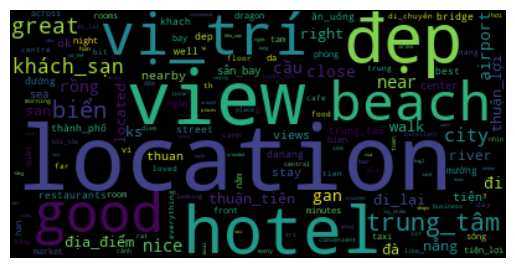

In [32]:
from wordcloud import WordCloud
import nltk
from nltk.probability import FreqDist
text=''
for i in camxuc[camxuc['Label_Chude']=='vi_tri']['Sentence']:
    text=text+i+' '
text_pre=nltk.word_tokenize(Text_Preprocessing(text)) # Tokenizing
print("Number of words: ",len(text_pre))
print(text_pre)
frequency_dist = FreqDist(word.lower() for word in text_pre)
print(frequency_dist.most_common(50))
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def tukhoa(label):
    text=''
    for i in camxuc[camxuc['Label_Chude']==label]['Sentence']:
        text=text+i+' '
    # print(type(text))
    text= text.lower()
    text=text.replace('hotel','')
    text=text.replace('khách sạn','')
    text=text.replace('ks','')
    text_pre=nltk.word_tokenize(Text_Preprocessing(text)) # Tokenizing
    print(label)
    print("Number of words: ",len(text_pre))
    frequency_dist = FreqDist(word.lower() for word in text_pre)
    print(frequency_dist.most_common(50))
    wcloud = WordCloud().generate_from_frequencies(frequency_dist)
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

vi_tri
Number of words:  1856
[('location', 92), ('view', 59), ('đẹp', 48), ('vị_trí', 45), ('good', 42), ('beach', 41), ('trung_tâm', 35), ('biển', 33), ('great', 31), ('city', 22), ('near', 20), ('nice', 19), ('cầu', 17), ('rồng', 17), ('đi', 16), ('gan', 16), ('close', 16), ('airport', 16), ('địa_điểm', 14), ('thuận_tiện', 14), ('san', 13), ('located', 13), ('đà', 12), ('nẵng', 12), ('đi_lại', 12), ('thuận_lợi', 12), ('walk', 11), ('right', 11), ('river', 10), ('tiện', 9), ('thuan', 9), ('ok', 9), ('nearby', 9), ('views', 9), ('stay', 9), ('center', 8), ('sân_bay', 8), ('sea', 8), ('thành_phố', 7), ('đường', 7), ('mường', 7), ('dep', 7), ('trung_tam', 7), ('khach', 7), ('bridge', 7), ('street', 7), ('danang', 7), ('ăn_uống', 7), ('best', 7), ('well', 7)]


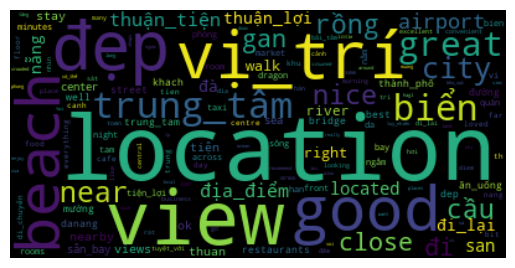

gia
Number of words:  473
[('giá', 35), ('price', 26), ('giá_cả', 18), ('hợp_lý', 17), ('tiền', 17), ('good', 16), ('money', 13), ('phòng', 11), ('value', 10), ('ok', 8), ('reasonable', 7), ('phù_hợp', 6), ('gia', 6), ('agoda', 5), ('worth', 5), ('ko', 5), ('rẻ', 4), ('xứng_đáng', 3), ('charge', 3), ('nói_chung', 3), ('k', 3), ('hợp_lí', 3), ('tot', 3), ('ca', 3), ('hài_lòng', 3), ('great', 3), ('room', 3), ('affordable', 3), ('satisfied', 3), ('aceptable', 3), ('tầm', 3), ('thử', 2), ('đi', 2), ('triệu', 2), ('đẹp', 2), ('gia_phong', 2), ('lai', 2), ('chất_lượng', 2), ('hop', 2), ('ly', 2), ('va', 2), ('vat', 2), ('travel', 2), ('high', 2), ('priced', 2), ('compared', 2), ('prices', 2), ('stay', 2), ('overpriced', 2), ('sạch_sẽ', 2)]


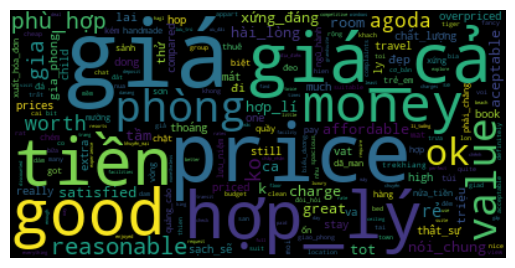

dich_vu
Number of words:  2419
[('breakfast', 89), ('good', 43), ('món', 40), ('đồ', 38), ('dịch_vụ', 37), ('ngon', 35), ('service', 34), ('buffet', 32), ('phòng', 23), ('great', 17), ('food', 13), ('bữa', 12), ('ko', 12), ('co', 12), ('check', 12), ('ok', 11), ('excellent', 11), ('hơi', 10), ('khong', 10), ('tệ', 10), ('spa', 10), ('khach', 10), ('toi', 10), ('services', 10), ('time', 10), ('stay', 10), ('h', 10), ('dọn', 10), ('đa_dạng', 9), ('free', 9), ('airport', 9), ('tạm', 8), ('kém', 8), ('massage', 8), ('san', 8), ('phong', 8), ('foods', 8), ('bad', 8), ('standard', 8), ('poor', 8), ('one', 8), ('thức_ăn', 7), ('vu', 7), ('va', 7), ('cac', 7), ('average', 7), ('room', 7), ('stars', 7), ('would', 7), ('best', 7)]


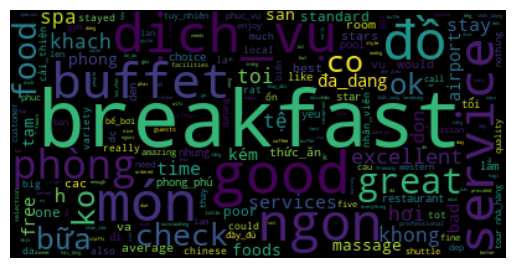

co_so_vat_chat
Number of words:  2342
[('phòng', 115), ('room', 91), ('rooms', 37), ('rộng', 33), ('đẹp', 33), ('cũ', 30), ('big', 28), ('tiện_nghi', 24), ('spacious', 23), ('good', 22), ('large', 21), ('nice', 19), ('pool', 19), ('thang_máy', 18), ('rộng_rãi', 17), ('facilities', 17), ('phong', 16), ('hơi', 15), ('wifi', 15), ('great', 15), ('ko', 12), ('old', 12), ('comfortable', 12), ('bed', 12), ('bồn_tắm', 10), ('view', 10), ('hệ_thống', 9), ('giường', 9), ('tắm', 9), ('swimming', 9), ('stayed', 9), ('well', 9), ('suite', 9), ('bathroom', 9), ('star', 9), ('tuy_nhiên', 8), ('gym', 8), ('nội_thất', 8), ('bar', 8), ('floor', 8), ('chờ', 7), ('phòng_ốc', 7), ('ok', 7), ('nghi', 7), ('bể_bơi', 7), ('really', 7), ('sạch_sẽ', 6), ('đầy_đủ', 6), ('kém', 6), ('mát', 6)]


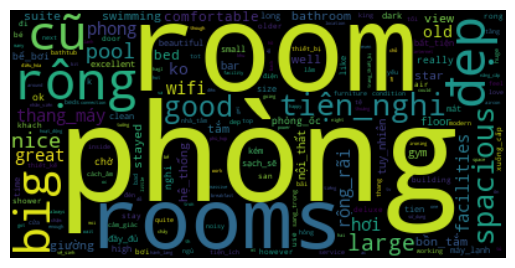

nhan_vien
Number of words:  1764
[('staff', 117), ('nhân_viên', 114), ('friendly', 54), ('nhiệt_tình', 48), ('thân_thiện', 42), ('helpful', 39), ('phục_vụ', 25), ('phòng', 23), ('lễ_tân', 18), ('staffs', 18), ('nice', 15), ('great', 15), ('stay', 15), ('hỗ_trợ', 14), ('chuyên_nghiệp', 14), ('nhan', 13), ('vien', 13), ('reception', 13), ('service', 13), ('good', 12), ('thái_độ', 11), ('english', 11), ('check', 10), ('chu_đáo', 10), ('nhiệt_tình_nhân_viên', 9), ('ko', 9), ('nv', 9), ('phuc', 9), ('vu', 9), ('help', 9), ('đồ', 6), ('stayed', 6), ('tiếp_tân', 5), ('khách_hàng', 5), ('gọi', 5), ('lich', 5), ('su', 5), ('tot', 5), ('thien', 5), ('always', 5), ('made', 5), ('much', 5), ('extremely', 5), ('đổi', 4), ('cực_kỳ', 4), ('vui_vẻ', 4), ('hài_lòng', 4), ('chúng_tôi', 4), ('agoda', 4), ('cười', 4)]


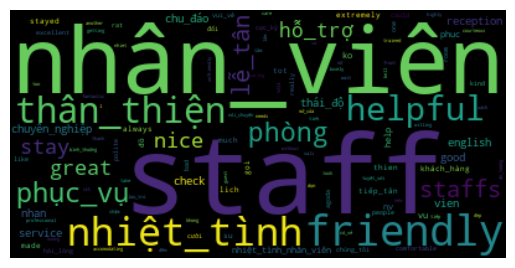

ve_sinh
Number of words:  866
[('sạch_sẽ', 70), ('clean', 53), ('phòng', 47), ('room', 24), ('sạch', 23), ('mùi', 16), ('phòng_ốc', 10), ('bẩn', 10), ('sach', 9), ('good', 9), ('vệ_sinh', 8), ('dọn', 8), ('ko', 8), ('nice', 7), ('dirty', 7), ('tuy_nhiên', 6), ('dơ', 6), ('đi', 6), ('se', 6), ('rooms', 6), ('hôi', 5), ('bể_bơi', 5), ('stay', 5), ('windows', 5), ('tắm', 4), ('hơi', 4), ('khó_chịu', 4), ('kính', 4), ('ok', 4), ('comfortable', 4), ('floor', 4), ('view', 4), ('glasses', 4), ('toilet', 3), ('lắm', 3), ('gọn_gàng', 3), ('thoáng', 3), ('mát', 3), ('thay', 3), ('sạch_đẹp', 3), ('cửa_sổ', 3), ('cảm_giác', 3), ('tầng', 3), ('lau', 3), ('buffet', 3), ('phong', 3), ('thi', 3), ('cleaning', 3), ('etc', 3), ('smell', 3)]


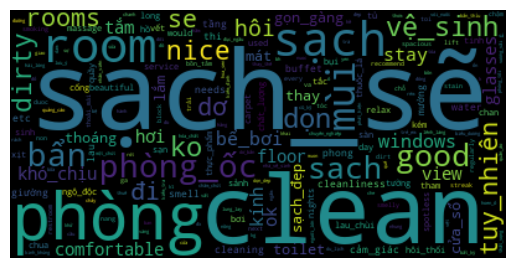

In [34]:
tukhoa('vi_tri')
tukhoa('gia')
tukhoa('dich_vu')
tukhoa('co_so_vat_chat')
tukhoa('nhan_vien')
tukhoa('ve_sinh')

phân tích cảm xúc theo chủ đề

In [35]:
camxuc

ID                                           Sentence Label_Chude   
0        1                  Khách sạn nằm vị trí gần cầu Rồng      vi_tri  \
1        2                                         giá cả tốt         gia   
2        3  Từ khách sạn đi bộ khoảng 10 phút đến trung tâ...      vi_tri   
3        4                              Khách sạn hơi xa biển      vi_tri   
4        5                                       Dịch vụ tốt.      vi_tri   
...    ...                                                ...         ...   
1941  1942  The restaurant is really only for breakfast. I...     dich_vu   
1942  1943  The rooms were really nice. We booked the larg...      vi_tri   
1943  1944                         Nice view from 40th floor.      vi_tri   
1944  1945                                        Vị trí đẹp.      vi_tri   
1945  1946                                  Buffet hơi ít món     dich_vu   

     Label_Camxuc  
0        positive  
1        positive  
2        positive  
3        negative  
4        positive  
...           ...  
1941     negative  
1942     positive  
1943     positive  
1944     positive  
1945     negative  

[1946 rows x 4 columns]

In [36]:
camxuc[camxuc['Label_Chude']=='dich_vu'].groupby(["Label_Camxuc"]).count().sort_index(ascending=False).reset_index()


Label_Camxuc   ID  Sentence  Label_Chude
0     positive  194       194          194
1     negative  221       221          221

In [37]:
import plotly.express as px
fig=px.pie(camxuc,values=camxuc[camxuc['Label_Chude']=='dich_vu'].groupby(["Label_Camxuc"]).count().sort_index(ascending=False).reset_index()['ID'],
           names=['Negative',"Positive"],
           hole=.4,color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly", title='dich_vu')
fig.update_layout(title_font_size=30)
fig.show()

In [38]:
import plotly.express as px
fig=px.pie(camxuc,values=camxuc.groupby(["Label_Camxuc"]).count().reset_index()['ID'],
           names=['Negative',"Positive"],
           hole=.4,color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly", title='Tổng quan')
fig.update_layout(title_font_size=30)
fig.show()

In [39]:
camxuc['Label_Camxuc'].value_counts()

Label_Camxuc
positive    1306
negative     640
Name: count, dtype: int64

In [40]:
def chude(label):
    fig=px.pie(camxuc,values=camxuc[camxuc['Label_Chude']==label].groupby(["Label_Camxuc"]).count().reset_index()['ID'],
           names=['Negative',"Positive"],
           hole=.4,color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly", title=label)
    fig.update_layout(title_font_size=30)
    fig.show()
    for cam in ['negative','positive']:
        print(cam)
        text=''
        for i in camxuc[camxuc['Label_Chude']==label][camxuc[camxuc['Label_Chude']==label]['Label_Camxuc']==cam]['Sentence']:
            # print(i)
            text=text+i+' '
        # print(type(text))
        text= text.lower()
        text=text.replace('hotel','')
        text=text.replace('khách sạn','')
        text=text.replace('ks','')
        text_pre=nltk.word_tokenize(Text_Preprocessing(text)) # Tokenizing
        # print(label)
        # print(text)
        print("Number of words: ",len(text_pre))
        frequency_dist = FreqDist(word.lower() for word in text_pre)
        print(frequency_dist.most_common(1000))
        wcloud = WordCloud().generate_from_frequencies(frequency_dist)
        plt.imshow(wcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

negative
Number of words:  170
[('location', 9), ('beach', 8), ('biển', 7), ('hơi', 5), ('đi', 5), ('khu', 3), ('good', 3), ('far', 3), ('near', 3), ('great', 3), ('city', 3), ('taxi', 2), ('bất_tiện', 2), ('view', 2), ('trung_tâm', 2), ('vị_trí', 2), ('street', 2), ('little', 2), ('stay', 2), ('loved', 2), ('crowded', 2), ('tầm', 1), ('km', 1), ('xấu', 1), ('k', 1), ('thuận_tiện', 1), ('địa_điểm', 1), ('lắm', 1), ('nhien', 1), ('tiếc', 1), ('la', 1), ('biến', 1), ('tuy_nhiên', 1), ('tắm', 1), ('thành_phố', 1), ('vi_tri', 1), ('tam', 1), ('duoc', 1), ('du_lịch', 1), ('bãi_tắm', 1), ('vui_chơi', 1), ('vi', 1), ('tri', 1), ('phong', 1), ('ko', 1), ('thuan', 1), ('loi', 1), ('viec', 1), ('ngam', 1), ('canh', 1), ('cua', 1), ('nho', 1), ('nhin', 1), ('dat', 1), ('hoang', 1), ('muong', 1), ('ngo', 1), ('quyen', 1), ('place', 1), ('actions', 1), ('totally', 1), ('disappointed', 1), ('last', 1), ('anything', 1), ('ngã', 1), ('tư', 1), ('đông', 1), ('xe', 1), ('chật_chội', 1), ('central', 1), 

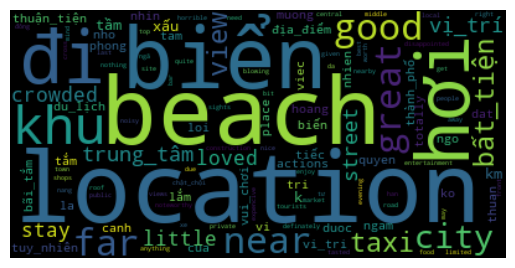

positive
Number of words:  1686
[('location', 83), ('view', 57), ('đẹp', 48), ('vị_trí', 43), ('good', 39), ('trung_tâm', 33), ('beach', 33), ('great', 28), ('biển', 26), ('city', 19), ('nice', 18), ('cầu', 17), ('rồng', 17), ('near', 17), ('gan', 16), ('close', 16), ('airport', 16), ('địa_điểm', 13), ('thuận_tiện', 13), ('san', 13), ('located', 13), ('đà', 12), ('nẵng', 12), ('đi_lại', 12), ('thuận_lợi', 12), ('đi', 11), ('walk', 11), ('river', 10), ('right', 10), ('tiện', 9), ('ok', 9), ('thuan', 8), ('nearby', 8), ('views', 8), ('center', 8), ('sân_bay', 8), ('sea', 8), ('đường', 7), ('mường', 7), ('dep', 7), ('trung_tam', 7), ('khach', 7), ('bridge', 7), ('stay', 7), ('danang', 7), ('ăn_uống', 7), ('well', 7), ('restaurants', 7), ('nằm', 6), ('thành_phố', 6), ('tiện_lợi', 6), ('quán', 6), ('sông', 6), ('phòng', 6), ('bien', 6), ('ngắm', 6), ('night', 6), ('dragon', 6), ('rooms', 6), ('room', 6), ('across', 6), ('bay', 6), ('best', 6), ('minutes', 6), ('cafe', 5), ('hàn', 5), ('trun

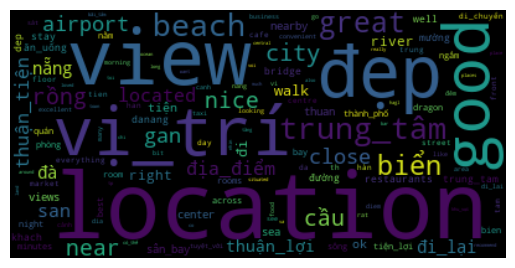

negative
Number of words:  149
[('giá', 7), ('tiền', 5), ('ko', 5), ('charge', 3), ('k', 3), ('agoda', 2), ('nói_chung', 2), ('gia_phong', 2), ('lai', 2), ('good', 2), ('value', 2), ('price', 2), ('overpriced', 2), ('thật_sự', 2), ('dong', 2), ('extra', 2), ('child', 2), ('xuất_hóa_đơn', 1), ('trẻ_em', 1), ('mường', 1), ('xứng', 1), ('biệt', 1), ('quầy', 1), ('hàng', 1), ('lưu_niệm', 1), ('sảnh', 1), ('chặt', 1), ('chém', 1), ('dã_man', 1), ('vòng', 1), ('đá', 1), ('đeo', 1), ('quảng_cáo', 1), ('handmade', 1), ('ngũ_hành', 1), ('sơn', 1), ('kém', 1), ('trekhiang', 1), ('moi', 1), ('giao_phong', 1), ('nua', 1), ('bữa', 1), ('trưa', 1), ('đắt', 1), ('lon', 1), ('bia', 1), ('tiger', 1), ('phòng', 1), ('voi', 1), ('nhu', 1), ('hien', 1), ('tai', 1), ('va', 1), ('khong', 1), ('cai', 1), ('thien', 1), ('co', 1), ('vat', 1), ('chat', 1), ('toi', 1), ('se', 1), ('khach', 1), ('san', 1), ('bed', 1), ('room', 1), ('suit', 1), ('reasonable', 1), ('stay', 1), ('dám', 1), ('đòi_hỏi', 1), ('ok', 1),

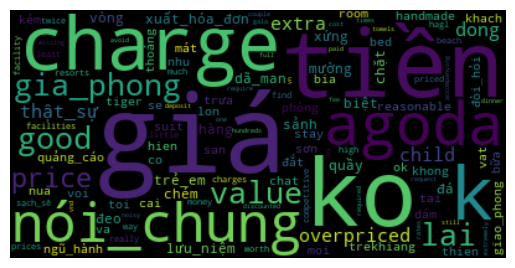

positive
Number of words:  324
[('giá', 28), ('price', 24), ('giá_cả', 18), ('hợp_lý', 17), ('good', 14), ('tiền', 12), ('money', 12), ('phòng', 10), ('value', 8), ('ok', 7), ('phù_hợp', 6), ('gia', 6), ('reasonable', 6), ('rẻ', 4), ('worth', 4), ('agoda', 3), ('xứng_đáng', 3), ('hợp_lí', 3), ('tot', 3), ('ca', 3), ('hài_lòng', 3), ('great', 3), ('affordable', 3), ('satisfied', 3), ('aceptable', 3), ('tầm', 3), ('thử', 2), ('đi', 2), ('triệu', 2), ('đẹp', 2), ('chất_lượng', 2), ('hop', 2), ('ly', 2), ('travel', 2), ('compared', 2), ('room', 2), ('book', 2), ('nửa_tiền', 1), ('phải_chăng', 1), ('hợp', 1), ('túi', 1), ('thuê', 1), ('got', 1), ('wat', 1), ('pay', 1), ('ổn', 1), ('biểu_dương', 1), ('va', 1), ('dam', 1), ('budget', 1), ('suitable', 1), ('group', 1), ('nice', 1), ('clean', 1), ('bit', 1), ('high', 1), ('priced', 1), ('many', 1), ('appart', 1), ('complaints', 1), ('quite', 1), ('location', 1), ('prices', 1), ('fancy', 1), ('town', 1), ('acceptable', 1), ('view', 1), ('cheap',

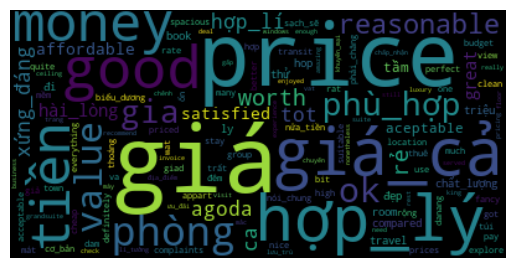

negative
Number of words:  1595
[('breakfast', 41), ('món', 30), ('đồ', 27), ('phòng', 20), ('buffet', 19), ('ngon', 16), ('ko', 12), ('co', 12), ('hơi', 10), ('khong', 10), ('tệ', 10), ('toi', 10), ('food', 10), ('service', 10), ('h', 10), ('dọn', 10), ('good', 9), ('check', 9), ('bữa', 8), ('tạm', 8), ('dịch_vụ', 8), ('kém', 8), ('massage', 8), ('khach', 8), ('phong', 8), ('bad', 7), ('average', 7), ('time', 7), ('thức_ăn', 6), ('lắm', 6), ('đa_dạng', 6), ('yeu', 6), ('san', 6), ('standard', 6), ('poor', 6), ('one', 6), ('nhân_viên', 5), ('cải_thiện', 5), ('spa', 5), ('la', 5), ('dc', 5), ('den', 5), ('va', 5), ('cac', 5), ('much', 5), ('stars', 5), ('star', 5), ('tuy_nhiên', 4), ('đi', 4), ('tối', 4), ('phục_vụ', 4), ('nhà_hàng', 4), ('k', 4), ('vu', 4), ('lam', 4), ('rat', 4), ('cau', 4), ('nhung', 4), ('fine', 4), ('big', 4), ('western', 4), ('choice', 4), ('like', 4), ('room', 4), ('local', 4), ('would', 4), ('stay', 4), ('nothing', 4), ('tour', 4), ('thay', 4), ('goi', 4), ('len

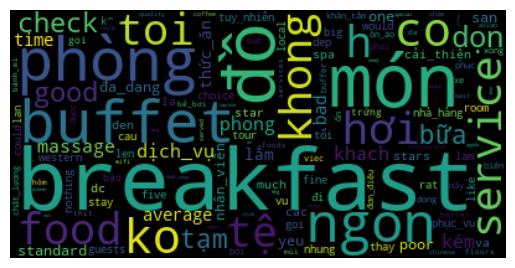

positive
Number of words:  824
[('breakfast', 48), ('good', 34), ('dịch_vụ', 28), ('service', 24), ('ngon', 19), ('great', 17), ('buffet', 13), ('đồ', 11), ('excellent', 11), ('món', 10), ('ok', 9), ('free', 8), ('airport', 8), ('services', 7), ('stay', 6), ('stayed', 5), ('spa', 5), ('foods', 5), ('phong_phú', 4), ('đa_dạng', 4), ('đầy_đủ', 4), ('bữa', 4), ('amazing', 4), ('pool', 4), ('tot', 4), ('variety', 4), ('best', 4), ('call', 4), ('taxi', 3), ('food', 3), ('nice', 3), ('time', 3), ('also', 3), ('morning', 3), ('vu', 3), ('room', 3), ('days', 3), ('outstanding', 3), ('would', 3), ('shuttle', 3), ('happy', 3), ('professional', 3), ('friendly', 3), ('restaurant', 3), ('check', 3), ('selection', 3), ('satisfactory', 3), ('us', 3), ('phòng', 3), ('facilities', 3), ('tối', 2), ('piano', 2), ('hài_lòng', 2), ('đi', 2), ('thức_ăn', 2), ('nhung', 2), ('va', 2), ('provided', 2), ('thank', 2), ('lot', 2), ('delicious', 2), ('order', 2), ('enjoy', 2), ('swimming', 2), ('recommended', 2), 

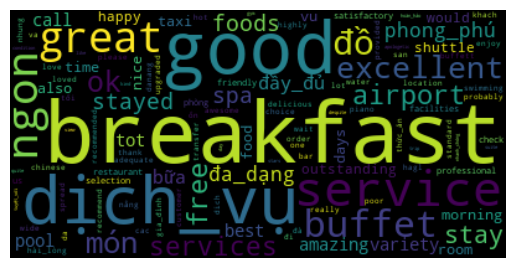

negative
Number of words:  1283
[('phòng', 51), ('cũ', 29), ('room', 25), ('thang_máy', 18), ('hơi', 14), ('ko', 12), ('old', 11), ('wifi', 10), ('hệ_thống', 9), ('bồn_tắm', 9), ('tắm', 9), ('tuy_nhiên', 8), ('pool', 8), ('chờ', 7), ('giường', 7), ('rooms', 7), ('kém', 6), ('máy_lạnh', 6), ('k', 6), ('gym', 6), ('floor', 6), ('đi', 5), ('xuống_cấp', 5), ('bể_bơi', 5), ('small', 5), ('swimming', 5), ('facilities', 5), ('star', 5), ('bất_tiện', 5), ('thang', 4), ('tệ', 4), ('cách_âm', 4), ('thiết_kế', 4), ('thiết_bị', 4), ('đèn', 4), ('lắm', 4), ('tiện_nghi', 4), ('cảm_giác', 4), ('hỏng', 4), ('cửa', 4), ('tối', 4), ('bar', 4), ('however', 4), ('building', 4), ('use', 4), ('stayed', 4), ('door', 4), ('older', 4), ('good', 4), ('shower', 4), ('dark', 4), ('air', 4), ('yếu', 4), ('nội_thất', 4), ('tầng', 3), ('deluxe', 3), ('tiếng', 3), ('nhân_viên', 3), ('tường', 3), ('chậm', 3), ('lanh', 3), ('khu', 3), ('vệ_sinh', 3), ('tủ', 3), ('mát', 3), ('sử_dụng', 3), ('điều_hòa', 3), ('điện', 3), 

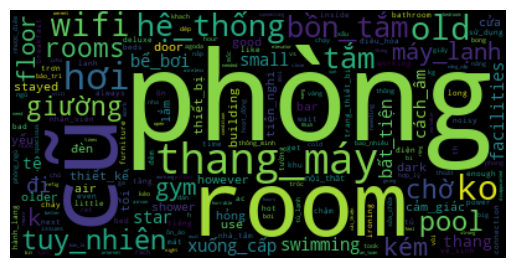

positive
Number of words:  1059
[('room', 66), ('phòng', 63), ('đẹp', 33), ('rộng', 31), ('rooms', 30), ('big', 26), ('large', 21), ('spacious', 21), ('tiện_nghi', 20), ('nice', 19), ('good', 18), ('rộng_rãi', 17), ('great', 15), ('phong', 14), ('facilities', 12), ('comfortable', 12), ('pool', 11), ('view', 10), ('bed', 9), ('well', 8), ('suite', 8), ('ok', 7), ('sạch_sẽ', 6), ('phòng_ốc', 6), ('nghi', 6), ('really', 6), ('bathroom', 6), ('excellent', 6), ('size', 6), ('đầy_đủ', 5), ('tien', 5), ('wifi', 5), ('rong', 5), ('high', 5), ('stayed', 5), ('clean', 5), ('beautiful', 5), ('stay', 5), ('bé', 5), ('dep', 4), ('khach', 4), ('san', 4), ('sang_trọng', 4), ('nội_thất', 4), ('love', 4), ('huge', 4), ('swimming', 4), ('star', 4), ('bar', 4), ('modern', 4), ('top', 4), ('bơi', 3), ('tot', 3), ('oc', 3), ('hai', 3), ('long', 3), ('time', 3), ('quite', 3), ('king', 3), ('service', 3), ('like', 3), ('thoáng', 3), ('mát', 3), ('got', 3), ('tiện_ích', 3), ('bãi', 3), ('one', 3), ('nghỉ', 2)

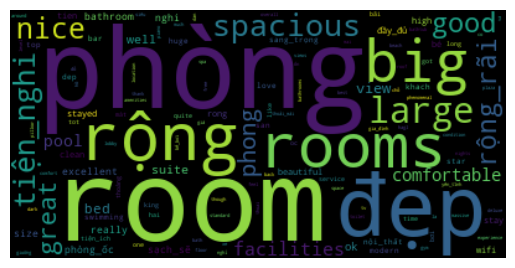

negative
Number of words:  673
[('nhân_viên', 35), ('staff', 18), ('phòng', 12), ('lễ_tân', 11), ('ko', 9), ('thân_thiện', 7), ('chuyên_nghiệp', 7), ('reception', 7), ('thái_độ', 6), ('check', 6), ('nhiệt_tình', 5), ('phục_vụ', 5), ('gọi', 5), ('nhan', 4), ('vien', 4), ('cười', 4), ('english', 4), ('bad', 4), ('service', 4), ('friendly', 4), ('one', 4), ('đồ', 4), ('lắm', 3), ('agoda', 3), ('chậm', 3), ('có_vẻ', 3), ('tiếp_tân', 3), ('nv', 3), ('phuc', 3), ('vu', 3), ('lich', 3), ('su', 3), ('nói_chuyện', 3), ('tiếp', 3), ('khong', 3), ('took', 3), ('wait', 3), ('another', 3), ('unfriendly', 3), ('helpful', 3), ('staffs', 3), ('l', 3), ('đêm', 3), ('xách', 3), ('vali', 3), ('mở_cửa', 3), ('bình_thường', 3), ('kém', 3), ('guest', 2), ('khách_hàng', 2), ('phong', 2), ('báo', 2), ('chờ', 2), ('nữ', 2), ('đợi', 2), ('tan', 2), ('chuyen', 2), ('nghiep', 2), ('mường', 2), ('mặt', 2), ('bao_giờ', 2), ('xị', 2), ('mệt_mỏi', 2), ('nguoi', 2), ('nao', 2), ('voi', 2), ('trained', 2), ('requested'

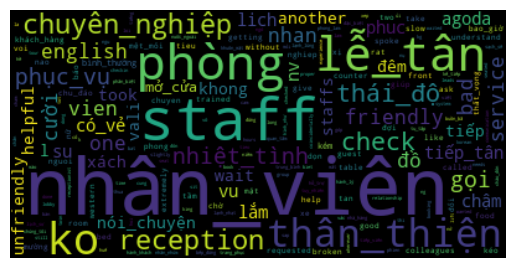

positive
Number of words:  1088
[('staff', 99), ('nhân_viên', 76), ('friendly', 50), ('nhiệt_tình', 41), ('helpful', 36), ('thân_thiện', 34), ('phục_vụ', 20), ('great', 15), ('staffs', 15), ('nice', 14), ('stay', 14), ('hỗ_trợ', 13), ('phòng', 11), ('nhiệt_tình_nhân_viên', 11), ('good', 10), ('nhan', 9), ('vien', 9), ('service', 9), ('chu_đáo', 8), ('lễ_tân', 7), ('chuyên_nghiệp', 7), ('help', 7), ('english', 7), ('nv', 6), ('phuc', 6), ('vu', 6), ('reception', 6), ('thái_độ', 5), ('thien', 5), ('always', 5), ('stayed', 5), ('cực_kỳ', 4), ('vui_vẻ', 4), ('hài_lòng', 4), ('check', 4), ('tot', 4), ('comfortable', 4), ('polite', 4), ('excellent', 4), ('really', 4), ('kind', 4), ('made', 4), ('much', 4), ('tuyệt_vời', 3), ('chúng_tôi', 3), ('đẹp', 3), ('nhiet', 3), ('tinh', 3), ('highly', 3), ('courteous', 3), ('lovely', 3), ('people', 3), ('could', 3), ('willing', 3), ('fantastic', 3), ('khách_hàng', 3), ('care', 3), ('extremely', 3), ('thank', 3), ('us', 3), ('accomodating', 3), ('bell',

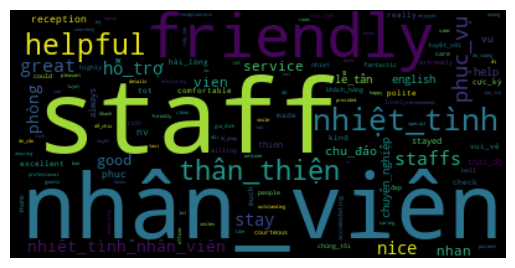

negative
Number of words:  489
[('phòng', 21), ('mùi', 15), ('bẩn', 10), ('room', 10), ('dọn', 8), ('ko', 8), ('sạch', 8), ('dirty', 7), ('tuy_nhiên', 6), ('vệ_sinh', 6), ('dơ', 6), ('đi', 6), ('sạch_sẽ', 5), ('clean', 5), ('tắm', 4), ('hơi', 4), ('khó_chịu', 4), ('kính', 4), ('hôi', 4), ('bể_bơi', 4), ('floor', 4), ('windows', 4), ('toilet', 3), ('lắm', 3), ('cửa_sổ', 3), ('cảm_giác', 3), ('tầng', 3), ('lau', 3), ('thi', 3), ('smell', 3), ('giường', 3), ('mường', 3), ('cống', 2), ('tắc', 2), ('hồ', 2), ('bơi', 2), ('hôi_thối', 2), ('xịt', 2), ('sảnh', 2), ('thay', 2), ('lau_chùi', 2), ('sinh', 2), ('sach', 2), ('tường', 2), ('vết', 2), ('tủ', 2), ('chất_lượng', 2), ('ngộ_độc', 2), ('thực_phẩm', 2), ('bụi', 2), ('sàn', 2), ('quầy', 2), ('buffet', 2), ('chan', 2), ('kém', 2), ('tham', 2), ('chua', 2), ('rooms', 2), ('used', 2), ('stay', 2), ('carpet', 2), ('smoking', 2), ('water', 2), ('lift', 2), ('trải', 2), ('restroom', 2), ('ga', 2), ('bồn_tắm', 2), ('tóc', 2), ('view', 2), ('chỗ', 

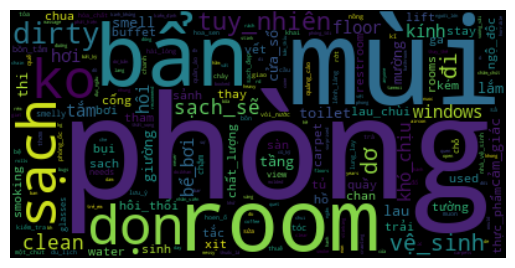

positive
Number of words:  377
[('sạch_sẽ', 66), ('clean', 48), ('phòng', 26), ('sạch', 14), ('room', 14), ('phòng_ốc', 9), ('good', 8), ('sach', 7), ('nice', 7), ('se', 6), ('comfortable', 4), ('rooms', 4), ('gọn_gàng', 3), ('thoáng', 3), ('mát', 3), ('ok', 3), ('stay', 3), ('etc', 3), ('cleanliness', 3), ('vệ_sinh', 2), ('sạn', 2), ('phong', 2), ('tinh', 2), ('nights', 2), ('beautiful', 2), ('relax', 2), ('spotless', 2), ('cleaning', 2), ('service', 2), ('view', 2), ('every', 2), ('va', 2), ('duoc', 2), ('nang', 2), ('toi', 2), ('sạch_đẹp', 2), ('glasses', 2), ('spacious', 2), ('thoải_mái', 2), ('chuyên_nghiệp', 1), ('dọn_dẹp', 1), ('hằng', 1), ('ổn', 1), ('biểu_dương', 1), ('đẹp', 1), ('yen', 1), ('spent', 1), ('supportive', 1), ('team', 1), ('long', 1), ('pretty', 1), ('beds', 1), ('city', 1), ('big', 1), ('always', 1), ('buffet', 1), ('entire', 1), ('great', 1), ('safe', 1), ('area', 1), ('best', 1), ('cleaniness', 1), ('location', 1), ('steam', 1), ('baths', 1), ('massage', 1), (

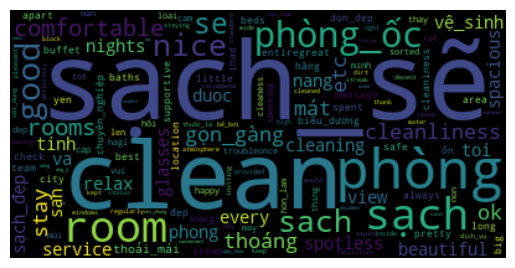

In [41]:
for c in camxuc['Label_Chude'].unique():
    chude(c)

In [42]:
camxuc

ID                                           Sentence Label_Chude   
0        1                  Khách sạn nằm vị trí gần cầu Rồng      vi_tri  \
1        2                                         giá cả tốt         gia   
2        3  Từ khách sạn đi bộ khoảng 10 phút đến trung tâ...      vi_tri   
3        4                              Khách sạn hơi xa biển      vi_tri   
4        5                                       Dịch vụ tốt.      vi_tri   
...    ...                                                ...         ...   
1941  1942  The restaurant is really only for breakfast. I...     dich_vu   
1942  1943  The rooms were really nice. We booked the larg...      vi_tri   
1943  1944                         Nice view from 40th floor.      vi_tri   
1944  1945                                        Vị trí đẹp.      vi_tri   
1945  1946                                  Buffet hơi ít món     dich_vu   

     Label_Camxuc  
0        positive  
1        positive  
2        positive  
3        negative  
4        positive  
...           ...  
1941     negative  
1942     positive  
1943     positive  
1944     positive  
1945     negative  

[1946 rows x 4 columns]

Chủ đề

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, cdy_train, cdy_test = train_test_split(camxuc['Sentence'].values, camxuc['Label_Chude'].values, test_size = 0.2, random_state = 0)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', lowercase = True)
cd_train = vectorizer.fit_transform(x_train)
cd_test = vectorizer.transform(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [45]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
def model_chude(model):
    model.fit(cd_train, cdy_train)
    y_pred = model.predict(cd_test)
    print('ROC_AUC_Score:', multiclass_roc_auc_score(cdy_test, y_pred))
    print('Accuracy:',accuracy_score(cdy_test, y_pred))
    print('F1_score:',f1_score(cdy_test, y_pred, average="macro"))
    print(classification_report(cdy_test, y_pred))
    conf_mat = confusion_matrix(cdy_test, y_pred)
    ax = plt.subplots(figsize=(9, 9))
    ax = sns.heatmap(conf_mat, square = True, annot=True, fmt = 'd', cmap="YlGnBu", 
                 xticklabels = camxuc['Label_Chude'].unique(), yticklabels = camxuc['Label_Chude'].unique(), cbar = False)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()
    

ROC_AUC_Score: 0.9131477186371942
Accuracy: 0.8743589743589744
F1_score: 0.8710732001274023
                precision    recall  f1-score   support

co_so_vat_chat       0.80      0.93      0.86        92
       dich_vu       0.89      0.80      0.84        87
           gia       1.00      0.73      0.85        30
     nhan_vien       0.93      0.91      0.92        74
       ve_sinh       0.93      0.79      0.86        34
        vi_tri       0.86      0.95      0.90        73

      accuracy                           0.87       390
     macro avg       0.90      0.85      0.87       390
  weighted avg       0.88      0.87      0.87       390



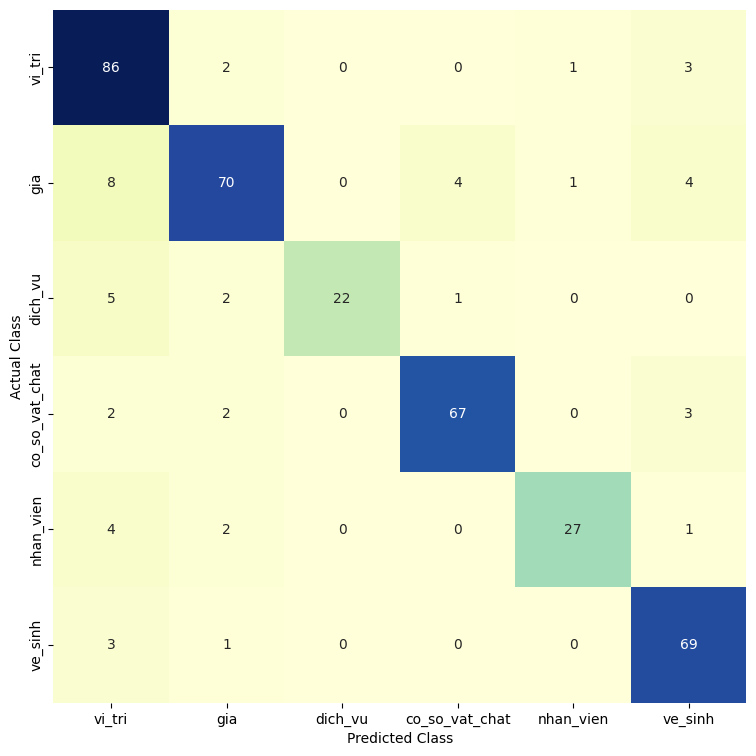

In [46]:
MNB_model = MultinomialNB()
model_chude(MNB_model)

ROC_AUC_Score: 0.9306493597483781
Accuracy: 0.8846153846153846
F1_score: 0.8918734044311222
                precision    recall  f1-score   support

co_so_vat_chat       0.86      0.85      0.85        92
       dich_vu       0.82      0.86      0.84        87
           gia       0.96      0.90      0.93        30
     nhan_vien       0.97      0.91      0.94        74
       ve_sinh       0.91      0.85      0.88        34
        vi_tri       0.88      0.95      0.91        73

      accuracy                           0.88       390
     macro avg       0.90      0.89      0.89       390
  weighted avg       0.89      0.88      0.89       390



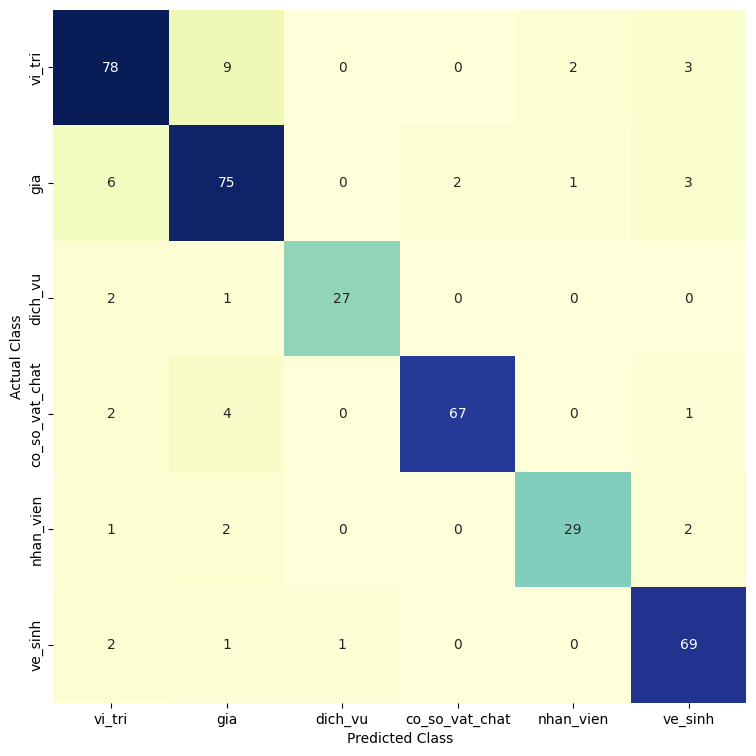

In [47]:
clf=svm.SVC(kernel='linear',C=1000)
model_chude(clf)

ROC_AUC_Score: 0.9252552461304565
Accuracy: 0.8794871794871795
F1_score: 0.8860788199654598
                precision    recall  f1-score   support

co_so_vat_chat       0.78      0.91      0.84        92
       dich_vu       0.88      0.83      0.85        87
           gia       0.96      0.87      0.91        30
     nhan_vien       0.94      0.89      0.92        74
       ve_sinh       0.91      0.85      0.88        34
        vi_tri       0.93      0.90      0.92        73

      accuracy                           0.88       390
     macro avg       0.90      0.88      0.89       390
  weighted avg       0.89      0.88      0.88       390



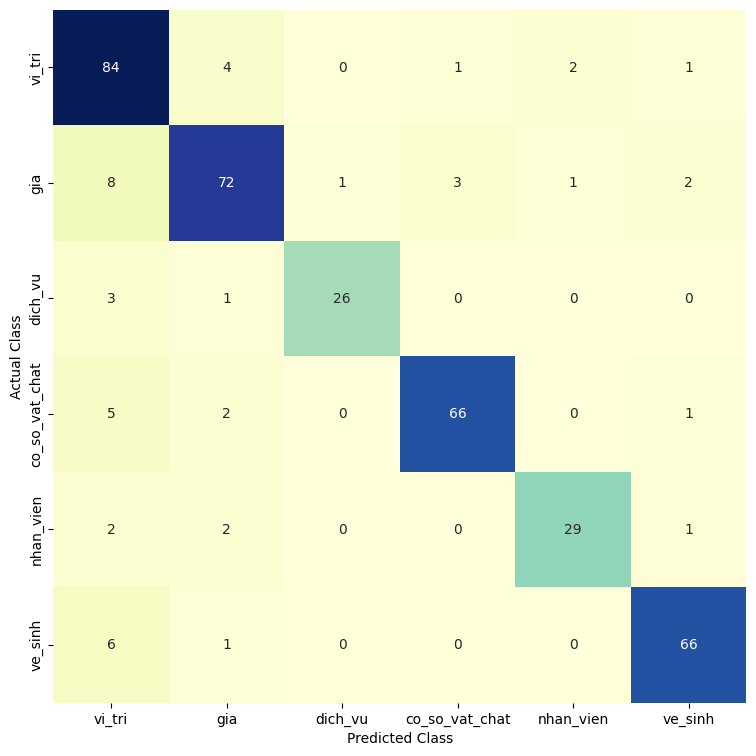

In [48]:
rfw=RandomForestClassifier()
model_chude(rfw)

Cảm xúc

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, cxy_train, cxy_test = train_test_split(camxuc['Sentence'].values, camxuc['Label_Camxuc'].values, test_size = 0.2, random_state = 0)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', lowercase = True)
cx_train = vectorizer.fit_transform(x_train)
cx_test = vectorizer.transform(x_test)

In [50]:
def model_camxuc(model):
    model.fit(cx_train, cxy_train)
    y_pred = model.predict(cx_test)
    print('ROC_AUC_Score:', multiclass_roc_auc_score(cxy_test, y_pred))
    print('accuracy: ',accuracy_score(cxy_test, y_pred))
    print('precision: ',precision_score(cxy_test, y_pred, average = 'macro'))
    print('F1_score: ',f1_score(cxy_test, y_pred, average="macro"))
    print(classification_report(cxy_test, y_pred))
    conf_mat = confusion_matrix(cxy_test, y_pred)
    ax = plt.subplots(figsize=(9, 9))
    ax = sns.heatmap(conf_mat, square = True, annot=True, fmt = 'd', cmap="YlGnBu", 
                 xticklabels = camxuc['Label_Camxuc'].unique(), yticklabels = camxuc['Label_Camxuc'].unique(), cbar = False)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")

ROC_AUC_Score: 0.7785714285714287
accuracy:  0.8564102564102564
precision:  0.8525641025641025
F1_score:  0.8037665324899368
              precision    recall  f1-score   support

    negative       0.85      0.60      0.70       110
    positive       0.86      0.96      0.91       280

    accuracy                           0.86       390
   macro avg       0.85      0.78      0.80       390
weighted avg       0.86      0.86      0.85       390



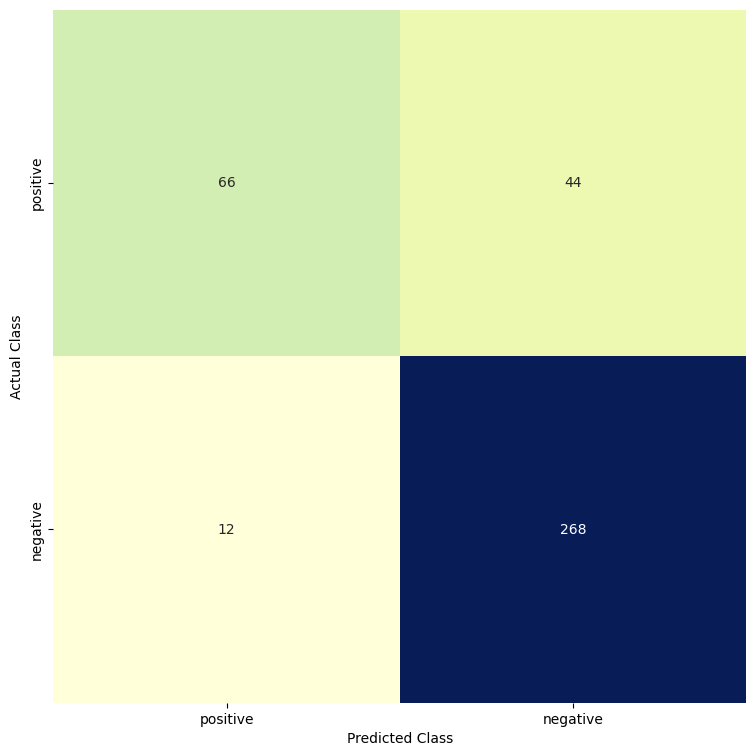

In [51]:
MNB_model = MultinomialNB()
model_camxuc(MNB_model)

ROC_AUC_Score: 0.8250000000000001
accuracy:  0.8358974358974359
precision:  0.7961538461538462
F1_score:  0.8074074074074074
              precision    recall  f1-score   support

    negative       0.68      0.80      0.73       110
    positive       0.92      0.85      0.88       280

    accuracy                           0.84       390
   macro avg       0.80      0.82      0.81       390
weighted avg       0.85      0.84      0.84       390



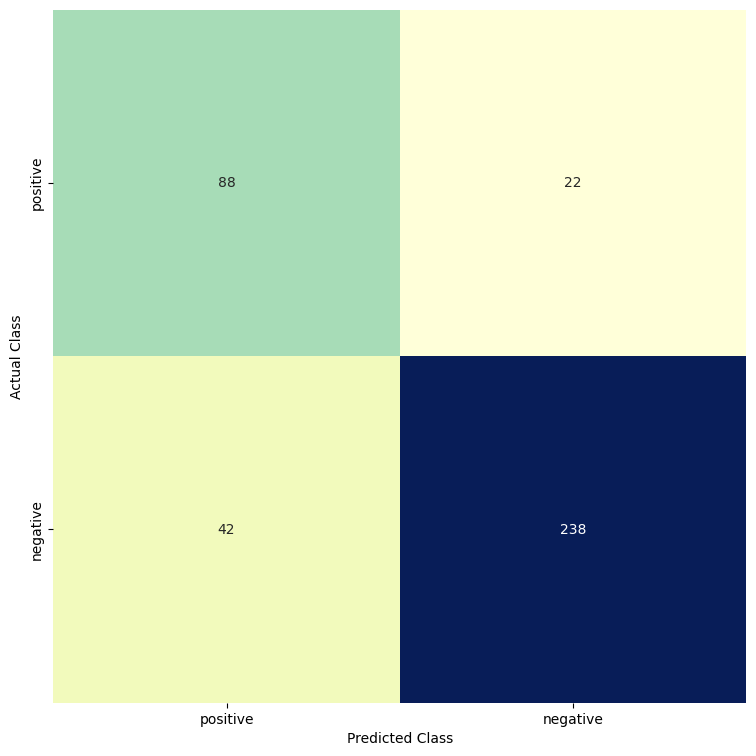

In [52]:
clf=svm.SVC(kernel='linear',C=1000)
model_camxuc(clf)

ROC_AUC_Score: 0.8069805194805195
accuracy:  0.8615384615384616
precision:  0.8398145485911443
F1_score:  0.8207720588235294
              precision    recall  f1-score   support

    negative       0.80      0.68      0.74       110
    positive       0.88      0.93      0.91       280

    accuracy                           0.86       390
   macro avg       0.84      0.81      0.82       390
weighted avg       0.86      0.86      0.86       390



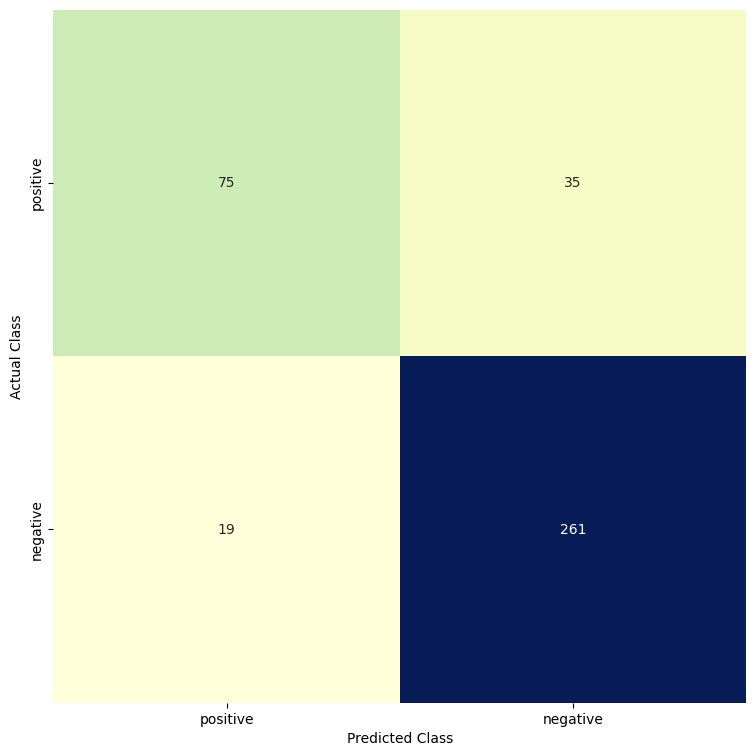

In [53]:
rfw=RandomForestClassifier()
model_camxuc(rfw)

### Lưu model

In [54]:
cd=svm.SVC(kernel='linear',C=1000)
cd.fit(cd_train, cdy_train)
cx=svm.SVC(kernel='linear',C=1000)
cx.fit(cx_train, cxy_train)

SVC(C=1000, kernel='linear')

In [55]:
import pickle
pickle.dump(cd, open('ChuDe.pkl', 'wb'))
pickle.dump(cx, open('CamXuc.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
chude = pickle.load(open('ChuDe.pkl', 'rb'))
camxuc = pickle.load(open('CamXuc.pkl', 'rb'))

### Dùng thử

In [56]:
def prediction(sen):
    list_dict=[]
    for sentence in re.split(r' *[\.,;:-\?!][\'"\)\]]* *', sen):
        dicts={}
        cd_pre = vectorizer.transform([sentence.strip()])
        dicts['Sentence'] = sentence
        dicts['Chủ đề'] = chude.predict(cd_pre)[0]
        cx_pre = vectorizer.transform([sentence.strip()])
        dicts['Cảm xúc'] = camxuc.predict(cx_pre)[0]
        list_dict.append(dicts)
    df=pd.DataFrame(list_dict)
    return df

In [57]:
prediction('Khách sạn đẹp, nhưng vệ sinh không sạch sẽ, thái độ nhân viên không tốt, ở xa trung tâm thành phố')

Sentence          Chủ đề   Cảm xúc
0                Khách sạn đẹp  co_so_vat_chat  positive
1  nhưng vệ sinh không sạch sẽ         ve_sinh  negative
2  thái độ nhân viên không tốt       nhan_vien  negative
3     ở xa trung tâm thành phố          vi_tri  positive

In [58]:
prediction('Phòng cũ nhưng lại rộng rãi, cơ sở vật chất tiện nghi. Đáng giá, tuy nhiên cần cải thiện menu của buffet sáng')

Sentence          Chủ đề   Cảm xúc
0                   Phòng cũ nhưng lại rộng rãi  co_so_vat_chat  positive
1                      cơ sở vật chất tiện nghi  co_so_vat_chat  positive
2                                      Đáng giá             gia  positive
3  tuy nhiên cần cải thiện menu của buffet sáng         dich_vu  negative